# CSC311 - HW4 Solution

# Anlan Wu - utorid: wuanlan

# 1. Unsupervised Learning

In [1]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [2]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

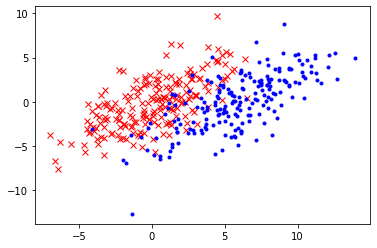

In [29]:
# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
plt.plot(x_class1[:,0], x_class1[:,1], 'xr') # first class, x shape
plt.plot(x_class2[:,0], x_class2[:,1], '.b') # second class, circle shape

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [4]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.sum(np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R))
    return J

In [8]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.zeros((N, K))
    for k in range(K):
        r[:, k] = np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    #R_new = np.zeros((N, K)) # Set to zeros/ones with shape (N, K)
    #R_new[..., ...] = 1 # Assign to 1
    R_new = np.vstack([1 - arg_min, arg_min]).T
    #print(R_new)
    return R_new

In [9]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = R.T.dot(data).T / np.vstack([np.sum(R, axis=0), np.sum(R, axis=0)])
    return Mu_new

In [40]:
# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 10
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)

costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    J = cost(data, R, Mu)
    costs.append(J)
    print(it, J)

class1_indices = np.where(R[:, 0])[0] # indices of class_1
class2_indices = np.where(R[:, 1])[0] # indices of class_2

class1 = data[class1_indices]
class2 = data[class2_indices]

0 33414.87875139048
1 33204.151383059085
2 33106.848102897886
3 33108.153478690474
4 33108.58562195947
5 33112.14778583632
6 33114.74264177763
7 33118.32917934032
8 33118.32917934032
9 33118.32917934032


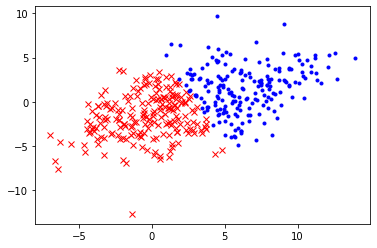

In [41]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point
plt.plot(class1[:,0], class1[:,1], 'xr') # first class, x shape
plt.plot(class2[:,0], class2[:,1], '.b') # second class, circle shape

Text(0.5, 1.0, 'Cost by Iteration')

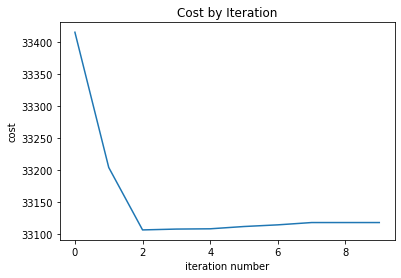

In [42]:
plt.plot([i for i in range(max_iter)], costs)
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.title("Cost by Iteration")

In [338]:
same = labels == R[:,1]
print("The misclassification error rate is:")
print(np.sum(1 - same) / N)

The misclassification error rate is:
0.2175


## 3. Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with means as in Qs 2.1 k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations in the lecture, for the M (Maximization) step, you also need to use this following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [43]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [53]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L, T = 0., 0.
    for n in range(N):
        
        for k in range(K):
            T += Pi[k] @ Sigma[k] # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
        L += np.log(T)
    return L

In [56]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    Gamma = np.zeros([N, K]) # zeros of shape (N,K), matrix of responsibilities
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * Sigma[k]
        Gamma[n, :] /= Pi @ Sigma # Normalize by sum across second dimension (mixtures)
    return Gamma

In [320]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(data, axis=0) # Sum along first axis 
    Mu = np.zeros((D,K))
    Sigma = []

    for k in range(K):
        # ...
        Sigma[k] = ... 
    # Pi = ... 
    return Mu, Sigma, Pi

In [321]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

#for it in range(max_iter):
    #Gamma = gm_e_step(data, Mu, Sigma, Pi)
    #Mu, Sigma, Pi = gm_m_step(data, Gamma)
    # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging

#class_1 = np.where(Gamma[:, 0] >= .5)
#class_2 = np.where(Gamma[:, 1] >= .5)


In [ ]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

## 4. Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments.
* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?
 


**TODO: Your written answer here**

...

# 2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file. 
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [90]:
from qlearning import qlearn
from maze import MazeEnv, ProbabilisticMazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

In [262]:
# %load qlearning.py
import numpy as np
import math
import copy

def qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=None, k_exp_sched=None):
    """ Runs tabular Q learning algorithm for stochastic environment.

    Args:
        env: instance of environment object 
        num_iters (int): Number of episodes to run Q-learning algorithm
        alpha (float): The learning rate between [0,1]
        gamma (float): Discount factor, between [0,1)
        epsilon (float): Probability in [0,1] that the agent selects a random move instead of 
                selecting greedily from Q value
        max_steps (int): Maximum number of steps in the environment per episode
        use_softmax_policy (bool): Whether to use softmax policy (True) or Epsilon-Greedy (False)
        init_beta (float): If using stochastic policy, sets the initial beta as the parameter for the softmax
        k_exp_sched (float): If using stochastic policy, sets hyperparameter for exponential schedule
            on beta
    
    Returns:
        q_hat: A Q-value table shaped [num_states, num_actions] for environment with with num_states 
            number of states (e.g. num rows * num columns for grid) and num_actions number of possible 
            actions (e.g. 4 actions up/down/left/right)
        steps_vs_iters: An array of size num_iters. Each element denotes the number 
            of steps in the environment that the agent took to get to the goal
            (capped to max_steps)
    """
    action_space_size = env.num_actions
    state_space_size = env.num_states
    q_hat = np.zeros(shape=(state_space_size, action_space_size))
    steps_vs_iters = np.zeros(num_iters)
    
    for i in range(num_iters):
        # TODO: Initialize current state by resetting the environment
        curr_state = env.reset()
        num_steps = 0
        done = False

        # TODO: Keep looping while environment isn't done and less than maximum steps
        while not done and num_steps < max_steps:
            num_steps += 1

            # Choose an action using policy derived from either softmax Q-value 
            # or epsilon greedy
            if use_softmax_policy:
                assert(init_beta is not None)
                assert(k_exp_sched is not None)
                # TODO: Boltzmann stochastic policy
                beta = beta_exp_schedule(init_beta, num_steps) # Call beta_exp_schedule to get the current beta value
                action = softmax_policy(q_hat, beta, curr_state)
            else:
                # TODO: Epsilon-greedy
                action = epsilon_greedy(q_hat, epsilon, curr_state, action_space_size)

            # TODO: Execute action in the environment and observe the next state, reward, and done flag
            next_state, reward, done = env.step(action)

            # TODO: Update Q_value
            if next_state != curr_state:
                new_value =  reward + gamma * (np.max(q_hat[next_state]))
                # TODO: Use Q-learning rule to update q_hat for the curr_state and action:
                # i.e., Q(s,a) <- Q(s,a) + alpha*[reward + gamma * max_a'(Q(s',a')) - Q(s,a)]
                q_hat[curr_state, action] = (1 - alpha) * q_hat[curr_state, action] + alpha * new_value
                
                # TODO: Update the current staet to be the next state
                curr_state = next_state

        steps_vs_iters[i] = num_steps
    
    return q_hat, steps_vs_iters


def epsilon_greedy(q_hat, epsilon, state, action_space_size):
    """ Chooses a random action with epsilon probability,
    otherwise choose the action with highest Q value for
    current observation

    Args:
        q_hat: A Q-value table shaped [num_states, num_actions] for 
            grid environment with num_rows rows and num_col columns and num_actions 
            number of possible actions
        epsilon (float): Probability in [0,1] that the agent selects a random 
            move instead of selecting greedily from Q value
        state (integer): Parameter.
        action_space_size (int): number of possible actions
    
    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    # TODO: Implement your code here
    # Hint: Sample from a uniform distribution and check if the sample is below
    # a certain threshold
    # ...
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(action_space_size)
    else:
        m = np.max(q_hat[state])
        ties = np.where(q_hat[state] == m)[0]
        action = np.random.choice(ties)
    return action
    

def softmax_policy(q_hat, beta, state):
    """ Choose action using policy derived from Q, using
    softmax of the Q values divided by the temperature.

    Args:
        q_hat: A Q-value table shaped [num_states, num_actions] for 
            grid environment with num_rows rows and num_col columns
        beta (float): Parameter for controlling the stochasticity of the action
        state (integer): Parameter.

    Returns:
        action (int): A number in the range [0, action_space_size-1]
            denoting the action the agent will take
    """
    # TODO: Implement your code here
    # Hint: use the stable_softmax function defined below
    _, num_actions = q_hat.shape
    output = stable_softmax(beta*q_hat, 1)
    action = np.random.choice(num_actions, 1, p=output[state])
    return action[0]

def beta_exp_schedule(init_beta, iteration, k=0.1):
   beta = init_beta * np.exp(k * iteration)
   return beta

def stable_softmax(x, axis=2):
    """ Numerically stable softmax:
    softmax(x) = e^x /(sum(e^x))
               = e^x / (e^max(x) * sum(e^x/e^max(x)))
    
    Args:
        x: An N-dimensional array of floats
        axis: The axis for normalizing over.
    
    Returns:
        output: softmax(x) along the specified dimension
    """
    max_x = np.max(x, axis, keepdims=True)
    z = np.exp(x - max_x)
    output = z / np.sum(z, axis, keepdims=True)
    
    return output

## 1. Basic Q Learning experiments

(a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero. 


In [267]:
# TODO: Fill this in
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

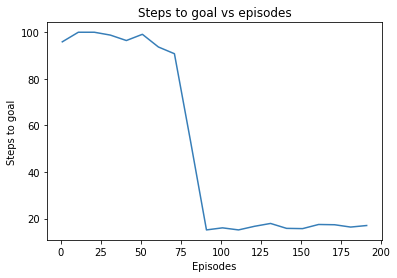

In [268]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Visualize the learned greedy policy from the Q values:

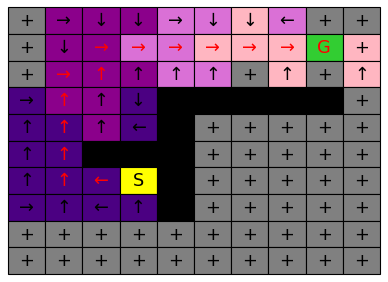

<Figure size 720x720 with 0 Axes>

In [269]:
# TODO: plot the policy from the Q value
plot_policy_from_q(q_hat, env)

(b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

In [270]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Set the goal
goal_locs = [[1, 8], [5, 6]]
env = MazeEnv(goals=goal_locs)

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

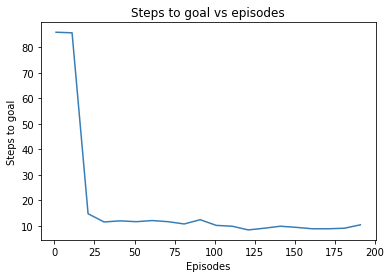

In [271]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Plot the steps to goal vs training iterations (episodes):

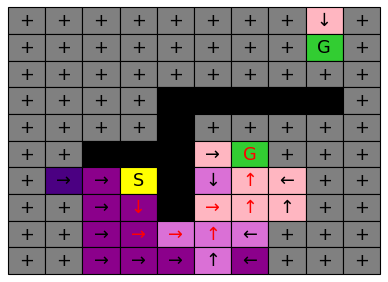

<Figure size 720x720 with 0 Axes>

In [272]:
# TODO: plot the policy from the Q values
plot_policy_from_q(q_hat, env)

## 2. Experiment with the exploration strategy, in the original environment

(a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [281]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
max_steps = 100
use_softmax_policy = False

# TODO: set the epsilon lists in increasing order:
epsilon_list = [0.01, 0.1, 0.5]

env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
    steps_vs_iters_list.append(steps_vs_iters)

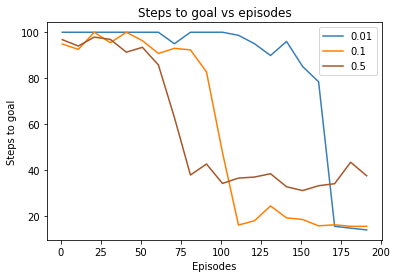

In [282]:
# TODO: Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, epsilon_list)

(b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

In [291]:
# TODO: Fill this in for Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta_list = [1, 3, 6]
use_softmax_policy = True
k_exp_schedule = 0.1 # (float) choose k such that we have a constant beta during training

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

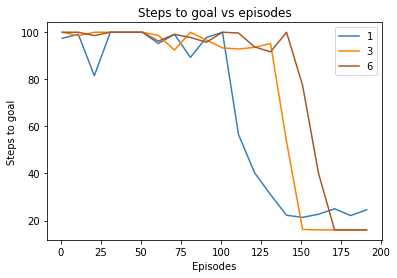

In [292]:
label_list = ["beta={}".format(beta) for beta in beta_list]
# TODO: 
plot_several_steps_vs_iters(steps_vs_iters_list, beta_list)

(c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [316]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 200

# TODO: Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [0.05, 0.1, 0.25, 0.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, beta, k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

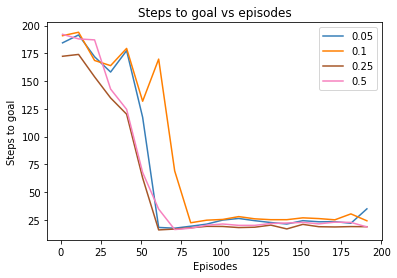

In [317]:
# TODO: Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, k_exp_schedule_list)

## 3. Stochastic Environments

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

In [ ]:
# TODO: Implement ProbabilisticMazeEnv in maze.py

In [313]:
# %load maze.py
import numpy as np
import copy
import math

ACTION_MEANING = {
    0: "UP",
    1: "RIGHT",
    2: "LEFT",
    3: "DOWN",
}

SPACE_MEANING = {
    1: "ROAD",
    0: "BARRIER",
    -1: "GOAL",
}


class MazeEnv:

    def __init__(self, start=[6,3], goals=[[1, 8]]):
        """Deterministic Maze Environment"""

        self.m_size = 10
        self.reward = 10
        self.num_actions = 4
        self.num_states = self.m_size * self.m_size

        self.map = np.ones((self.m_size, self.m_size))
        self.map[3, 4:9] = 0
        self.map[4:8, 4] = 0
        self.map[5, 2:4] = 0

        for goal in goals:
            self.map[goal[0], goal[1]] = -1

        self.start = start
        self.goals = goals
        self.obs = self.start

    def step(self, a):
        """ Perform a action on the environment

            Args:
                a (int): action integer

            Returns:
                obs (list): observation list
                reward (int): reward for such action
                done (int): whether the goal is reached
        """
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)

        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done

    def is_valid_obs(self, obs):
        """ Check whether the observation is valid

            Args:
                obs (list): observation [x, y]

            Returns:
                is_valid (bool)
        """

        if obs[0] >= self.m_size or obs[0] < 0:
            return False

        if obs[1] >= self.m_size or obs[1] < 0:
            return False

        if self.map[obs[0], obs[1]] == 0:
            return False

        return True

    @property
    def _get_obs(self):
        """ Get current observation
        """
        return self.obs
    
    @property
    def _get_state(self):
        """ Get current observation
        """
        return self.get_state_from_coords(self.obs[0], self.obs[1])
    
    @property
    def _get_start_state(self):
        """ Get the start state
        """
        return self.get_state_from_coords(self.start[0], self.start[1])
    
    @property
    def _get_goal_state(self):
        """ Get the start state
        """
        goals = []
        for goal in self.goals:
            goals.append(self.get_state_from_coords(goal[0], goal[1]))
        return goals

    def reset(self):
        """ Reset the observation into starting point
        """
        self.obs = self.start
        state = self.get_state_from_coords(self.obs[0], self.obs[1])
        return state
    
    def get_state_from_coords(self, row, col):
        state = row * self.m_size + col
        return state
    
    def get_coords_from_state(self, state):
        row = math.floor(state/self.m_size)
        col = state % self.m_size 
        return row, col


class ProbabilisticMazeEnv(MazeEnv):
    """ (Q2.3) Hints: you can refer the implementation in MazeEnv 
    """
    
    def __init__(self, goals=[[2, 8]], p_random=0.05):
        """ Probabilistic Maze Environment 

            Args:
                goals (list): list of goals coordinates
                p_random (float): random action rate
        """

        self.m_size = 10
        self.reward = 10
        self.num_actions = 4
        self.num_states = self.m_size * self.m_size

        self.map = np.ones((self.m_size, self.m_size))
        self.map[3, 4:9] = 0
        self.map[4:8, 4] = 0
        self.map[5, 2:4] = 0

        for goal in goals:
            self.map[goal[0], goal[1]] = -1

        self.start = [6,3]
        self.goals = goals
        self.obs = self.start
        self.p_random = p_random

    def step(self, a):
        done, reward = False, 0.0
        next_obs = copy.copy(self.obs)
        
        if np.random.uniform(0, 1) < self.p_random:
            a = np.random.randint(self.num_actions)
            
        if a == 0:
            next_obs[0] = next_obs[0] - 1
        elif a == 1:
            next_obs[1] = next_obs[1] + 1
        elif a == 2:
            next_obs[1] = next_obs[1] - 1
        elif a == 3:
            next_obs[0] = next_obs[0] + 1
        else:
            raise Exception("Action is Not Valid")

        if self.is_valid_obs(next_obs):
            self.obs = next_obs

        if self.map[self.obs[0], self.obs[1]] == -1:
            reward = self.reward
            done = True
        
        state = self.get_state_from_coords(self.obs[0], self.obs[1])

        return state, reward, done


(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [318]:
# TODO: Use the same parameters as in the first part, except change alpha
num_iters = 200
alpha = 0.5
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Set the environment probability of random
env_p_rand_list = [0.05, 0.1, 0.25, 0.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv(p_random=env_p_rand)

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

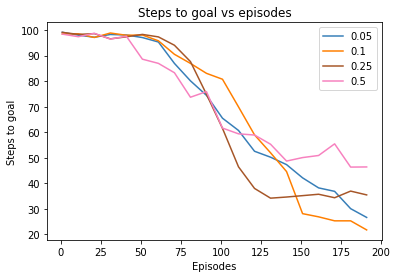

In [319]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, env_p_rand_list)

## 2.3 Write-up 

See 2.2.1, 2.2.2, 2.2.3 above for their respective graphs and figures.

Summary of experiments:

2.2.1 - Both a) and b) use the epsilon-greedy policy which chooses a random action with epsilon probability and otherwise the action with the max Q value. The epsilon used was 0.1. In b) two goal states were used (1,8) and (5,6), and the policy preferred the closer one at (5,6). In a), it took about 90 episodes for the number of steps to the goal to converge to about 15, whereas in b) it only took about 25 episodes for the number of steps to goal to converge to about 10.

2.2.2.a - In the experiments here I still used the epsilon-greedy policy but compared the results with different epsilon values. The values were 0.01, 0.1, 0.5. From the steps to goal vs episodes graph we can see several different results between epsilons. The highest epsilon value, 0.5, took the least number of episodes to converge but had a higher number of steps to goal. Whereas when epsilon decreases, it took longer for the number of steps to converge.

2.2.2.b - In the experiments here I used the softmax policy with different values of beta: 1, 3, 6. Here it looks like as the value of beta increases, the number of episodes needed for the number of steps to stabilize increased. Overall, the softmax policy took a greater number of episodes to converge compared to epsilon-greedy.

2.2.2.c - This time the value of beta is fixed at 1 and the value of k, the hyperparameter used for exponential schedule on beta, is varied: 0.05, 0.1, 0.25, 0.5. Changing the value of k appears to have little affect on the experiments. The graph showing the steps to goal vs episodes does not show significant differences between different values of k.

2.2.3 - This experiment makes the environment stochastic with different probabilities that the agent will move in a random direction despite choosing a direction: 0.05, 0.1, 0.25, 0.5. For the experiments, I used a learning rate of 0.5. The graph shows much more gradual lines to convergence compared to previous experiments. It also appears that with a higher stochastic probability, the number of steps to goal after the graph has converged at the end is higher.

# 3. Did you complete the course evaluation?

In [3]:
# Answer: yes